<a href="https://colab.research.google.com/github/oksk1111/self_machinelearning/blob/main/selfML_ch04_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_LogisticRegression_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification (다중 분류)

- Target data 에 2개 이상의 클래스가 포함된 문제 <br>

*** 
## 1. 로지스틱 회귀 (LogisticRegression)
- 이름은 회귀이지만 Classification 모델!! <br>
- LinearRegression 과 동일하게 선형 방정식 학습 <br>
- z = ax1 + bx2 + cx3 + ... + d <br>
- z를 0~1 사이의 확률값으료 표현하기 위해 logistic function 으로,
  - 2진 분류에 사용하는 결정함수 = Sigmoid <br>
  - 다중 분류에 사용하는 결정함수 = Softmax <br>

(* 실사용예는 LogisticRegression() 사용하는 부분 참고)

In [ ]:
# 문제: 생선 7개의 종류에 대한 특성들이 주어졌을때, 어떤 생선일지의 확률을 구하라.
#- 특성: height, width, length, digonal, weight
#- 타겟: 생선 종류 (Species)

# 1. data 준비
import pandas as pd

# 전체 데이터
#- 6개의 row 중 5개의 데이터를 feature 로 사용하고, Species 1개 항목은 target 으로 사용하기로 함.
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.head())   # pd.head(): data 의 상위 5개 행 출력
print('-----1')

# Target 분리
#- Species 항목의 종류 파악
print(pd.unique(fish['Species']))   #! 데이터 중 중복없는 unique 값을 뽑아냅

# Features 데이터 추출
#- Species 를 제외한 나머지
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()   # pd.df의 [ [row1, row2, ...] ] 형태로 [[]] 데이터 추출 가능; 사이킷런 학습에 np arr이 필요하므로 변환해 둠
print(fish_input[:5])
print('-----2')

# Target 데이터 추출
fish_target = fish['Species'].to_numpy()    # pd.df의 [row1] 형태로 [] 데이터 추출 가능; 정렬은 따로 안함
print(fish_target[:5])
print('-----3')

# Train / Test set 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)   # train_test_split(features, target)

# 데이터 표준화
#- features 가 여러개일 때는 데이터간 편차가 크므로 표준화 작업을 통해 해당 편차를 제거해야 한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)    # fit() + transform(); 학습데이터로 표준화하여 계수 특정화
test_scaled = ss.transform(test_input)          # Test-set 에도 Train-set 에서 만들어진 표준화 계수로 데이터를 변형!! (ch03) (이것이 중요)
print(train_scaled[:5])       # 데이터 결과는 feature 종류에 상관없이 비슷한 값의 형태
print(test_scaled[:5])

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340
-----1
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
-----2
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
-----3
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [ ]:
# 3. 학습 + 평가
#- 첫번째 접근 방법으로 KNeighborsClassifier 를 이용해 본다.

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)    # default n_neighbors=5; 해당 값이 낮을 수록 지역화. 높으면 전체화
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print('-----1')

# 4. 예측
#* 사이킷런 모델에 데이터가 전달되면 문자열은 순서가 자동으로 알파벳 순으로 정렬되어 버린다. (pd.unique()와 순서가 다르다!)
#* 사이킷런 predict() 를 사용하면 타깃값의 순서대로 예측을 한다. (순서가 바뀐것을 고려할 필요가 없음)
print(kn.classes_)
print(kn.predict(test_scaled[:5]))
print('-----2')

# 5. 검증
import numpy as np
proba = kn.predict_proba(test_scaled[:5])   # predict_proba(): 클래스별 확률값 반환
print(np.round(proba, decimals=4))    # 소수점 4자리까지 표시

#- 확인을 위해 4번째 샘플의 최근접 이웃 클래스 확인
#- KNeighbors() 의 입력은 2차원 배열이어야 한다. 슬라이싱을 이용해서 2차원 배열로 넣자.
#-- kneighbors() 로 인접한 이웃의 거리와 번호를 리턴 받음
print(test_scaled[3])     # 1차원 배열; 아래 출력에선 값을 보지 말고 배열 형태만 보자!
print(test_scaled[3:4])   # 2차원 배열
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

0.8907563025210085
0.85
-----1
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
-----2
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]
[['Roach' 'Perch' 'Perch']]


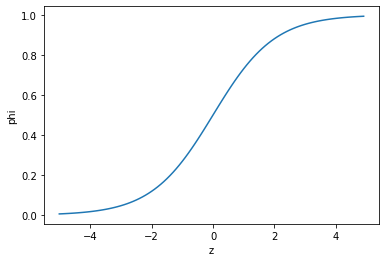

In [ ]:
#** Test code **
# 로지스틱 회귀 (Logistic Regression) 그래프 
#* 사이킷런은 z = 0.5 일때 음성 클래스로 판단. 라이브러리마다 다를 수 있다.

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)   # from, to, step
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
#** Test code **
# 넘파이 배열로 보고싶은 것만 보기: Boolean indexing (2차원 배열 형태로 호출해야 함)

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# Train-set 으로부터 index 를 뽑아 단 2종류의 데이터만 로지스틱 회귀를 적용해 보도록 하자. (2진 분류 동작 확인용. 이후 다중 분류!!)
#- 'Bream', 'Smelt'에 대해서 판단해 보도록 한다.

# 1. 데이터 준비

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt[:5])    # 2종류만 넣은 train 데이터
print(target_bream_smelt[:5])   # 2종류만 넣은 target 데이터

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
 # 3. 학습 + 평가
 from sklearn.linear_model import LogisticRegression
 lr = LogisticRegression()
 lr.fit(train_bream_smelt, target_bream_smelt)

# 4. 예측
print(lr.predict(train_bream_smelt[:5]))    #* 원래 훈련데이터로 해야 한다. 동작하는지만 확인하기 위함. 위 #1 데이터준비에서 출력한 값과 같음을 확인 <- 정상 예측
print('-----1')

# 5. 검증 (확률) predict_proba = probability
print(lr.classes_)    # 클래스의 종류와 index 확인
print(lr.predict_proba(train_bream_smelt[:5]))    # row 0: Bream, row 1: Smelt (알파벳 순 열 정렬)
print('-----2')



# 계수 확인: z = a * weight + b * length + c * diagonal + d * height + e * width + e(intercept_)
print(lr.coef_, lr.intercept_)    # a, b, c, d,   e
print('-----3')

# 결과값(=z) 확인: decision_function()
decisions = lr.decision_function(train_bream_smelt[:5])   # 0~5 데이터의 z 값
print(decisions)
print('-----4')

# 위 결과값(=z)을 시그모이드 함수에 넣어 확률로 표시
from scipy.special import expit   # expit = sigmoid function
print(expit(decisions))
print('-----5')

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
-----1
['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
-----2
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
-----3
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
-----4
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
-----5


In [ ]:
# 2진 분류 테스트가 잘 동작함을 확인했다. 이제 원래의 목적인 다중분류 진행

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용하는데 (반복횟수=max_iter, 기본값=100),
#- 데이터가 적으면 반복횟수가 적다는 경고가 발생 (테스트 데이터가 적어서 발생)
#-- Warning 없애기 위해 max_iter=1000 으로 주고 테스트 진행

# LogisticRegression 은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 (= L2 규제)
#- 릿지 회귀에서 alpha 매개변수로 규제의 양을 조절; alpha 가 커지면 규제가 커짐
## LogisticRegresion 에서의 규제 매개변수는 C; C가 커지면 규제가 줄어듬 (alpha 와 반대; 기본값=1)

# 3. 학습 + 평가
lr = LogisticRegression(C=20, max_iter=1000)    # 규제 완화를 위해 C=20
lr.fit(train_scaled, train_target)              # 7개의 생선 데이터가 모두 들어있는 것 사용
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#- LogisticRegression 은 분류할게 2개이면 자동으로 결정함수를 Sigmoid()로,
#-- 분류할게 2개 초과하면 자동으로 결정함수를 softmax() 로 수행.

0.9327731092436975
0.925


In [ ]:
# 4. 예측
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)        # 인덱스별 이름 파악
print(np.round(proba, decimals=3))    # 인덱스별 높은 값 찾으면 위 예측 검증이 된다; decimals 소수점 이하 자리
print('-----1')

print(lr.coef_.shape, lr.intercept_.shape)    # 5개의 feature; 다중 분류는 클래스마다 z값을 하나씩 계산한다. 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
#- 2진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환
#- 다중 분류는 소프트맥스 함수를 사용하여 7개의 z 값을 확률로 변환

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
-----1
(7, 5) (7,)


In [ ]:
# 5. 검증
#- 다중 분류가 LogisticRegression 을 사용할 경우 Softmax 함수로 동작함을 증명한다.

decision = lr.decision_function(test_scaled[:5])    # 0~5 까지의 데이터의 z값; 각 아이템당 7개의 z값 존재
print(np.round(decision, decimals=2))
print('-----1')

from scipy.special import softmax
proba = softmax(decision, axis=1)   # axis=1 -> 0, 1, 2 ...  1은 2차원 데이터의 아이템 한개(7개가 포함된 1행)를 축으로 하겠다는 의미; 데이터가 1차원으로 존재했다면 axis=0 이었을것임. 보통 2차원. 
print(np.round(proba, decimals=3))  # 결과는 #3의 예측 확률과 같다. softmax() 를 거쳤기에 7개의 모든 항목을 더하면 1이 된다.

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
-----1
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 2. 점진적 학습
- 이미 학습된 데이터에 추가적으로 학습 가능한 방식 <br>
- 대표적인 점진적 학습 알고리즘 = 확률적 경사 하강법 (Stochastic Gradient Descent) (확률적=랜덤하게 )<br>
- SGDClassifier 는 손실함수로 log 를 사용 (hinge도 가능) (아래에 설명) <br>
- 점진적 학습 필요한 이유: 데이터가 많아 한 번에 모두 컴퓨터 메모리에 읽을수 없다. 그래서 데이터를 조금씩 사용해 점진적으로 학습하는 방법이 필요하다. (메모리에 올라가 있는 것은 데이터가 아닌 모델만.) -> 확률적 경사하강법이 이 문제를 해결하는 핵심 열쇠 (ch07에 계속) <br>
  2.1. 확률적 경사하강법: 훈련 세트에서 랜덤하게 **하나의 샘플**을 고르는 것 (이때 **손실함수**로부터 경사가 가장 가파른 길을 찾아 조금씩 내려오면서) <br>
    - 훈련세트를 사용해 산 아래의 최적의 장소르 조금씩 이동하는 알고리즘 <br>
    - 에포크(epoch): 확률적 경사하강법에서 훈련 세트를 한번 모두 사용하면 1 에포크. <br>

  2.2. 미니배치 경사하강법(Mini batch GD): 무작위로 **몇 개의 샘플**로 경사하강법 수행 <br>
  2.3. 배치 경사하강법(Batch GD): 한번 경사로를 따라 이동하기 위해 **전체 샘플**을 경사하강법 수행 <br>

> 💬 신경망 알고리즘은 확률적 경사하강법을 이용한다. <br>
> 이유: 데이터가 많아 한번에 모든 데이터를 사용하기 어렵다. <br>

## 3. 손실함수 (Loss function), 비용함수 (Cost function)
- 손실함수: 머신러닝 알고리즘이 엉터리인지 측정하는 기준. 작을수록 좋다. 최소값을 알 수 없다. 샘플 하나에 대한 손실 <br>
- 비용함수: 모든 훈련 샘플에 대한 손실 함수의 합 <br>
- 손실 = 정답을 못맞춘것
- 비용함수 ≒ 손실함수 <br>
- 확률적 경사하강법(SGD)의 정확도를 높이기 위해 손실함수를 이용한다. <br>
- 손실 함수를 통해 손실이 가장 적은 위치를 선택해야 한다. <br>
- 로지스틱 손실 함수 (logistic loss function) = 이진 크로스엔트로피 손실 함수 (binary cross-entropy loss function) <br>
- -> target=1 일때, -log(예측확률); target=0일때, -log(1-예측확률)
- 손실함수는 미분 가능해야 한다. (기울기 계산 위해) <br>
- 정확도가 아닌 손실함수로 성능을 측정하는 이유는 각 데이터의 정확도는 데이터 의존적이기에 값이 듬성듬성 있을수 있으나, 손실함수는 예측값으로 하기에 결과값이 연속성을 가지고 있다. <br>
- 이진 분류는 로지스틱 손실 함수(=이진 크로스엔트로피 손실 함수) 사용 <br>
- 다중 분류는 크로스엔트로피 손실 함수 사용 <br>
- 회귀는 평균 제곱값 오차, 평균 제곱 오차 를 손실 함수로 사용 <br>


In [1]:
# SGDClassifier - 점진적 학습

# 1. data 준비
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# features 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [2]:
# 2. 학습 + 평가
from sklearn.linear_model import SGDClassifier

# SGDClassifier() 는 손실함수를 지정해 주어야 한다. (어떤때에 어떤 함수 쓰는지 파악 필요), max_iter=반복횟수(epoch) 지정가능
#- loss 매개변수 기본값='hinge' 이며 서포트벡터머신 알고리즘에서 사용된다.
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#-정확도가 낮다. 반복 횟수가 문제인듯?
#- ConvergenceWarning 이 뜨면 모델이 충분히 수렴하지 않았다는 것인데, 학습횟수를 늘려줘 보는것도 좋다.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [3]:
# SGD 는 점진적 학습이 가능하다!! partial_fit() 으로 추가 학습 가능; 함수 한번 call 에 1 epoch
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#- 에포크 한번에 성능이 조금 향상됨을 확인
#-- 에포크를 얼마나 더 늘러야 할까?

0.8151260504201681
0.825


In [4]:
# 에포크와 과대/과소적합
#- 에포크가 진행될수록 훈련세트 점수는 증가하지만 테스트세트 점수가 낮아지는 부분이 발생
#-- 해당 부분에서 과대적합되기 전에 훈련을 멈춰야 함 = 조기 종료(early stopping)

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []    # 에포크마다의 점수 기록용
test_score = []     # 에포크마다의 점수 기록용
classes = np.unique(train_target)   # partial_fit() 에서 classes  저장용. 오름차순 이어야 함.
print(classes)


# 300번의 에포크 훈련 반복 수행; for 점진적 학습을 통해 과대적합/과소적합의 접점을 찾기 위함
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)    # classes 를 추가한 이유: fit() 없이 partial_fit() 만 사용시엔 레이블이 존재하지 않기에 명시적으로 넣어줘야 한다!!
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]


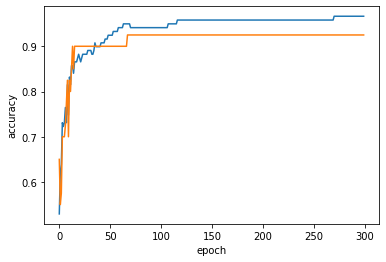

In [6]:
# 데이터 확인 (그래프)
import matplotlib.pyplot as plt

print(train_score[:5])
#- x축 = epochs, y축 = score

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#- 높은 점수중에, 훈련/테스트 세트의 score 차이가 가장 적은 100번째 epoch 가 적합한 반복횟수!

In [7]:
# 위 그래프를 기준으로 100번째 epoch 까지만 학습 이후 다시 score 확인

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)   # tol= 향상될 최솟값; None 으로 줄 경우 max_iter에 설정된 epoch 횟수 전체를 수행한다.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#- epoch=10 일때의 정확도보다 epoch=100 일때의 정확도가 높아 성능이 좋다고 할 수 있다.

0.957983193277311
0.925
